+ V3

In [55]:
import matplotlib.pyplot as plt

def activity_2(diameter, load, temp, gravity, atmosphere_pressure, people):
    new_load = add_persons(people, load)    
    air_pressure = atmosphere_pressure - ((6*new_load)/(gravity*3.14*(diameter**3)))
    temp_air = ((temp*atmosphere_pressure)/air_pressure)
    return [air_pressure, temp_air]

def temp_converter(temp, temp_scale):
    if temp_scale == 'fahrenheit':
        converted_temp = ((temp - 32) * (5/9)) + 273
        return converted_temp
    elif temp_scale == 'celsius':
        converted_temp = temp + 273
        return converted_temp
    elif temp_scale == 'kelvin':
        return temp
    else:
        return False

def kilogram_to_newton(weight):
    newton = weight/0.10197
    return newton

def add_persons(persons_newton, load):
    new_persons_newton = kilogram_to_newton(70) * persons_newton
    new_load = new_persons_newton + load
    return new_load

diameter = 15
load = 2670
temperature = 288
temp_scale = "Kelvin"
temp_scale = temp_scale.lower()
gravity = 9.81 
atmosphere_pressure = 1.227
people = range(6)  # De 0 a 5

converted_temp = temp_converter(temperature, temp_scale)

+ Gráfico Aumentando Quantidade de Pessoas

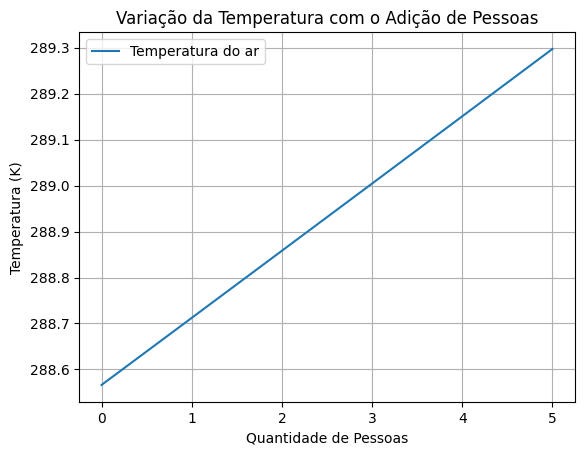

In [60]:
pressures = []
temperatures = []

for i in range(6):
    air_pressure, temp_air = activity_2(diameter, load, converted_temp, gravity, atmosphere_pressure, i)
    pressures.append(air_pressure)
    temperatures.append(temp_air)
    #print(temp_air, " - ",i)

plt.plot(people, temperatures, label='Temperatura do ar')
plt.xlabel('Quantidade de Pessoas')
plt.ylabel('Temperatura (K)')
plt.title('Variação da Temperatura com o Adição de Pessoas')
plt.legend()
plt.grid(True)
plt.show()

+ Gráfico Variando o Tamanho do Balão 

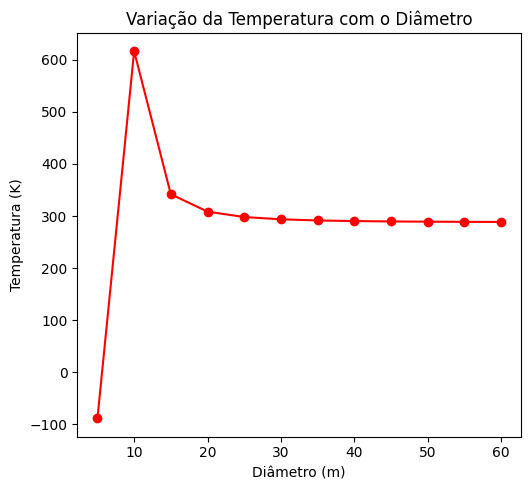

In [61]:
diameters = range(5, 61, 5)
pressures = []
temperatures = []

for diameter in diameters:
    result = activity_2(diameter, load, converted_temp, gravity, atmosphere_pressure, 1)
    temperatures.append(result[1])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(diameters, temperatures, marker='o', color='r')
plt.title('Variação da Temperatura com o Diâmetro')
plt.xlabel('Diâmetro (m)')
plt.ylabel('Temperatura (K)')

plt.tight_layout()
plt.show()